In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [26]:
col_names = ['year', 'company_name', 'prev_year', 'current_year', 'profit', 'growth']
data = pd.read_csv("/content/dataset1 - Copy of Sheet1.csv", header=None, names=col_names)

In [27]:
data = data.drop(index=0)
data = data.dropna()

In [28]:
data.replace(',','', regex=True, inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555 entries, 1 to 565
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          555 non-null    object
 1   company_name  555 non-null    object
 2   prev_year     555 non-null    object
 3   current_year  555 non-null    object
 4   profit        555 non-null    object
 5   growth        555 non-null    object
dtypes: object(6)
memory usage: 30.4+ KB


In [30]:
data.prev_year.astype(float).fillna(0.0)
data.current_year.astype(float).fillna(0.0)
feature_cols = ['prev_year', 'current_year']

X = data[feature_cols]
y = data.growth
X.columns = ['prev_year', 'current_year']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 16)

In [32]:
#machine learning- logistic regression model
logreg = LogisticRegression(random_state = 16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [33]:
#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 427.9555555555555, 'Predicted label')

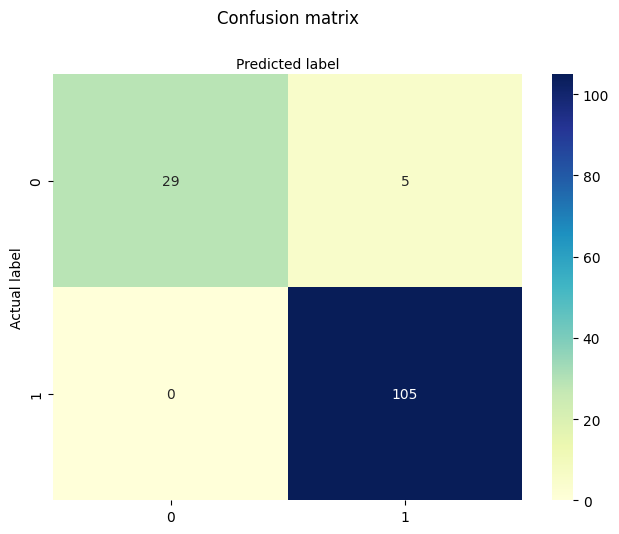

In [34]:
class_names=['yes','no']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
target_names = ['yes', 'no']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         yes       1.00      0.85      0.92        34
          no       0.95      1.00      0.98       105

    accuracy                           0.96       139
   macro avg       0.98      0.93      0.95       139
weighted avg       0.97      0.96      0.96       139



In [36]:
x_new = float(input("Enter Amount for Previous Year: "))
y_new = float(input("Enter Amount for Current Year: "))
cname = (input("Enter Company Name: "))
new_instance_array = np.array([x_new,y_new]).reshape(1, -1)

Enter Amount for Previous Year: 183.22
Enter Amount for Current Year: 229.69
Enter Company Name: Toyota


In [37]:
print("Company:",cname,"\nPrevious Year Amount(in billion usd): ", x_new,"\nCurrent Year Amount(in billion usd): ", y_new, "\nDid the company grow? ",logreg.predict(new_instance_array)[0])

Company: Toyota 
Previous Year Amount(in billion usd):  183.22 
Current Year Amount(in billion usd):  229.69 
Did the company grow?  yes
